# Week 1: Parsing RSS feeds

In [1]:
%%capture
!pip install --upgrade feedparser
!pip install --upgrade pandas

In [2]:
import seaborn as sns
sns.set()

In [3]:
import pprint
import pandas as pd

## Introduction to parsing RSS feeds

RSS, an acronym for Really Simple Syndication, is a text format for web content syndication. RSS is a standardised format, a dialect of XML, that allows humans and machines to track the content of a website (from articles, news, blogs, to forums) and see what has been changed or updated.

Most blogs and many websites have RSS feeds. For instance, http://feeds.bbci.co.uk/news/rss.xml?edition=uk points to the RSS feed of the BBC. If you click on the previous link, your browser will render a human-readable view of that RSS feed. If you look at the source (_Right click_ then _View Page Source_ of Firefox), you can see what the original RSS syntax look like.

Here are a few more examples of RSS feeds from newspapers:
- https://www.voanews.com/api/zqgpqoekmmqo
- https://moxie.foxnews.com/feedburner/latest.xml
- http://rss.cnn.com/rss/cnn_topstories.rss

Additionally, head to Wired to hear more about the history and politics of RSS feeds: https://www.wired.com/story/rss-readers-feedly-inoreader-old-reader/

If you are keen on plugging in to RSS feeds using your browsers, here is a nice tutorial:  https://www.leeds.anglican.org/content/easy-guide-how-do-i-subscribe-rss-feed


## Parsing RSS feeds in Python

Below, you can find a simple toy example of an RSS feed, using the traditional XML markup syntax with its nested tags (begins with < and ends with >).



In [4]:
example_rss = """<?xml version="1.0" encoding="UTF-8" ?>
<rss version="2.0">

<channel>
  <title>W3Schools Home Page</title>
  <link>https://www.w3schools.com</link>
  <description>Free web building tutorials</description>
  <item>
    <title>RSS Tutorial</title>
    <link>https://www.w3schools.com/xml/xml_rss.asp</link>
    <description>New RSS tutorial on W3Schools</description>
  </item>
  <item>
    <title>XML Tutorial</title>
    <link>https://www.w3schools.com/xml</link>
    <description>New XML tutorial on W3Schools</description>
  </item>
</channel>

</rss>"""

Instead of manually parsing this feed in Python, we will use a library (Universal Feed Parser), that automatically converts a string encoding an RSS feed into a dictionary.

Universal Feed Parser parses many types of syndication feeds found online (RSS 0.90, Netscape RSS 0.91, Userland RSS 0.91, RSS 0.92, RSS 0.93, RSS 0.94, RSS 1.0, RSS 2.0, Atom 0.3, Atom 1.0, CDF feeds…). It is extremely simple to use. The module has one primary public function, `parse`. `parse` takes one required argument, either a URL, a local filename, or a string containing feed data in any format.

In [5]:
import feedparser

Below, we parse the feed encoded in the string `example_rss` into a dictionary named `parsed_rss`. We then print it using `pprint.pprint` instead of the usual `print`. `pprint` is a standard Python module that let you “pretty-print” objects in a nicer form.

In [6]:
parsed_rss = feedparser.parse(example_rss)
pprint.pprint(parsed_rss)

{'bozo': False,
 'encoding': 'utf-8',
 'entries': [{'link': 'https://www.w3schools.com/xml/xml_rss.asp',
              'links': [{'href': 'https://www.w3schools.com/xml/xml_rss.asp',
                         'rel': 'alternate',
                         'type': 'text/html'}],
              'summary': 'New RSS tutorial on W3Schools',
              'summary_detail': {'base': '',
                                 'language': None,
                                 'type': 'text/html',
                                 'value': 'New RSS tutorial on W3Schools'},
              'title': 'RSS Tutorial',
              'title_detail': {'base': '',
                               'language': None,
                               'type': 'text/plain',
                               'value': 'RSS Tutorial'}},
             {'link': 'https://www.w3schools.com/xml',
              'links': [{'href': 'https://www.w3schools.com/xml',
                         'rel': 'alternate',
                         'type':

You can read more about the processing and sanitisation performed by Universal Feed parser on the module documentation at https://feedparser.readthedocs.io/en/latest/.

Briefly, the `feedparser.parse` function returns a dictionary with:
1. a few metadata related to the parsing (bozo, encoding, version…),
2. information about the feed itself (link, title, subtitle),
3. and a list of all the entries.

In [7]:
# General informations about the channel:
parsed_rss['feed']['title'], parsed_rss['feed']['link']

('W3Schools Home Page', 'https://www.w3schools.com')

In [8]:
nb_articles = len(parsed_rss['entries'])
print(f"The RSS feed has {nb_articles} entries")

The RSS feed has 2 entries


In [9]:
# Printing out the title and link of each entry:
for entry in parsed_rss['entries']:
    title = entry['title']
    link = entry['link']
    print(f"{title} -- {link}")

RSS Tutorial -- https://www.w3schools.com/xml/xml_rss.asp
XML Tutorial -- https://www.w3schools.com/xml


## Exercise 1: loading and parsing a remote feed

<div class="alert alert-info">

##### Exercise 1.1
Go to https://www.bbc.co.uk/news/10628494 and find the URL of the main news RSS feed.
Copy it below and load the RSS feed using feedparser.
</div>

In [10]:
d = feedparser.parse('feed://feeds.bbci.co.uk/news/rss.xml')

<div class="alert alert-info">

##### Exercise 1.2

Print the number of entries in the feed and print the titles of the first five entries

</div>

In [11]:
# Solution:
print(f"The feed has {len(d['entries'])} entries\n")

for entry in d['entries'][:5]:
    print(entry['title'])

The feed has 54 entries

UK space launch: Historic Cornwall rocket launch ends in failure
Prince Harry's book officially hits shops after days of leaks
Anti-strikes bill to be introduced to Parliament
Two British men missing in Ukraine, say officials
Scotland's primary schools shut as teachers strike


## Exercise 2: Storing RSS Feeds for later use


<div class="alert alert-info">

##### Exercise 2.1

First, we are going to convert the entries dictionary into a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe).

<ul>
<li>Keep only the four following columns: `title`, `summary`, `link`, `published`.</li>
<li>Convert `published` to the standard `datetime` object interpretable by Python. </li>
<li>Check the first few entries in the resulting dataframe</li>
</ul>

</div>

In [12]:
# Solution:
df = pd.DataFrame(d.entries, columns=['title', 'summary', 'link', 'published'])

In [13]:
# Convert the published column to a standard datetime object:
df.published = pd.to_datetime(df.published)

In [14]:
# how to filter non null values 
tmp_filter = df['summary'].isnull()
df[~tmp_filter]

,title,summary,link,published
0,UK space launch: Historic Cornwall rocket laun...,The first ever satellite mission launched from...,https://www.bbc.co.uk/news/science-environment...,2023-01-10 08:12:10+00:00
1,Prince Harry's book officially hits shops afte...,Fans queue to buy a hardback copy of the duke'...,https://www.bbc.co.uk/news/uk-64213852?at_medi...,2023-01-10 08:25:55+00:00
2,Anti-strikes bill to be introduced to Parliament,"Under the proposals, some trade union members ...",https://www.bbc.co.uk/news/uk-64219016?at_medi...,2023-01-10 08:06:55+00:00
3,"Two British men missing in Ukraine, say officials",A search is under way for British nationals An...,https://www.bbc.co.uk/news/uk-64214977?at_medi...,2023-01-10 06:42:51+00:00
4,Scotland's primary schools shut as teachers st...,The action by primary teachers will be followe...,https://www.bbc.co.uk/news/uk-scotland-6420997...,2023-01-10 06:21:47+00:00
5,Brazil Congress: Big pro-democracy rallies hel...,They come after supporters of ex-President Jai...,https://www.bbc.co.uk/news/world-latin-america...,2023-01-10 08:27:41+00:00
6,Potentially classified files found at Biden pr...,The FBI is reportedly involved in the inquiry ...,https://www.bbc.co.uk/news/world-us-canada-642...,2023-01-10 04:09:11+00:00
7,Hong Kong: Jimmy Lai's UK lawyers call for mee...,In a letter they say the Hong Kong media tycoo...,https://www.bbc.co.uk/news/world-asia-china-64...,2023-01-10 00:00:06+00:00
8,Diabetes artificial pancreas tech recommended ...,It can improve life for thousands with type 1 ...,https://www.bbc.co.uk/news/health-64211479?at_...,2023-01-10 03:05:53+00:00
9,Peru protests: Many dead in new clashes,At least 17 people are killed as anti-governme...,https://www.bbc.co.uk/news/world-latin-america...,2023-01-10 05:05:51+00:00


In [15]:
df.head()

,title,summary,link,published
0,UK space launch: Historic Cornwall rocket laun...,The first ever satellite mission launched from...,https://www.bbc.co.uk/news/science-environment...,2023-01-10 08:12:10+00:00
1,Prince Harry's book officially hits shops afte...,Fans queue to buy a hardback copy of the duke'...,https://www.bbc.co.uk/news/uk-64213852?at_medi...,2023-01-10 08:25:55+00:00
2,Anti-strikes bill to be introduced to Parliament,"Under the proposals, some trade union members ...",https://www.bbc.co.uk/news/uk-64219016?at_medi...,2023-01-10 08:06:55+00:00
3,"Two British men missing in Ukraine, say officials",A search is under way for British nationals An...,https://www.bbc.co.uk/news/uk-64214977?at_medi...,2023-01-10 06:42:51+00:00
4,Scotland's primary schools shut as teachers st...,The action by primary teachers will be followe...,https://www.bbc.co.uk/news/uk-scotland-6420997...,2023-01-10 06:21:47+00:00


Now, save the dataframe into a CSV file for later use.

<div class="alert alert-warning">

**Note:** if `index=True` (default option), `pandas` save an extra column indicating index number which, in our case, will be the row numbers. There are cases when index will be non-numerical or, if numerical, not representative of row numbers. `index=True` will be useful in those cases. 

</div>

In [17]:
# The first argument to the function tells it what to call the new file
df.to_csv("rss_feeds.csv",index=False)

In [18]:
# Sanity checks - load the csv file and check the columns of the saved dataset
# try this block after using `index=True` in the above block and note the difference.
saved_rss = pd.read_csv("rss_feeds.csv")
saved_rss.head()

,title,summary,link,published
0,UK space launch: Historic Cornwall rocket laun...,The first ever satellite mission launched from...,https://www.bbc.co.uk/news/science-environment...,2023-01-10 08:12:10+00:00
1,Prince Harry's book officially hits shops afte...,Fans queue to buy a hardback copy of the duke'...,https://www.bbc.co.uk/news/uk-64213852?at_medi...,2023-01-10 08:25:55+00:00
2,Anti-strikes bill to be introduced to Parliament,"Under the proposals, some trade union members ...",https://www.bbc.co.uk/news/uk-64219016?at_medi...,2023-01-10 08:06:55+00:00
3,"Two British men missing in Ukraine, say officials",A search is under way for British nationals An...,https://www.bbc.co.uk/news/uk-64214977?at_medi...,2023-01-10 06:42:51+00:00
4,Scotland's primary schools shut as teachers st...,The action by primary teachers will be followe...,https://www.bbc.co.uk/news/uk-scotland-6420997...,2023-01-10 06:21:47+00:00


In [19]:
saved_rss['published'] = pd.to_datetime(saved_rss['published'])
saved_rss['published'][3]

Timestamp('2023-01-10 06:42:51+0000', tz='UTC')

<div class="alert alert-info">

##### Exercise 2.3: collection over time

Assuming a day has passed, write a code snippet to:
1. load the old CSV file with the RSS feeds you saved
2.  fetch the new RSS feed, transform it into a pandas DataFrame
3. concatenate it with the older RSS feeds
4. save the resulting DataFrame to CSV back again.

</div>

In [20]:
# load the existing rss feeds
saved_rss = pd.read_csv("rss_feeds.csv")

# retrieve new rss feeds and make a dataframe
new_rss = feedparser.parse('feed://feeds.bbci.co.uk/news/rss.xml')
new_rss = pd.DataFrame(new_rss.entries, columns=['title', 'summary', 'link', 'published'])
new_rss.published = pd.to_datetime(new_rss.published)

# concatenate and save 
concat_rss = pd.concat([saved_rss, new_rss])
concat_rss.to_csv('rss_feeds.csv')

<div class="alert alert-info">

##### Exercise 2.4 (optional)

In data science and computer science, it is a good practice to write code in a modular fashion. This practice entails writing functions that are responsible for one and only one task. Can you think of modularizing the above code snippet?

Here is one way to modularize the above code snippet:
- a function `load_rss` takes as input, a string, and returns a pandas `DataFrame`;
- a function `retrieve_rss` takes as input, a string for rss url, and returns a pandas `DataFrame`;
- a function `concat_and_save_rss` takes as input, two pandas `DataFrame`, and returns nothing.

</div>

## Exercise 3: Understanding the collected feed

<div class="alert alert-info">

##### Exercise 3.1

Using the dataframe or the entries dictionary, **print out the time of the day each article was published**.

For pandas, read the following pages to learn how to use datetime columns:
- extracting hours: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html
- and other attributes that can be computed automatically: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components

</div>

In [21]:
df.published.head()

0   2023-01-10 08:12:10+00:00
1   2023-01-10 08:25:55+00:00
2   2023-01-10 08:06:55+00:00
3   2023-01-10 06:42:51+00:00
4   2023-01-10 06:21:47+00:00
Name: published, dtype: datetime64[ns, UTC]

In [22]:
# Solution using the dt.hour series

df['published_hour'] = df.published.dt.hour
df.published_hour.values

array([ 8,  8,  8,  6,  6,  8,  4,  0,  3,  5,  6,  6,  2,  9,  6, 22, 19,
       12,  7, 23, 15, 14, 11,  7,  0,  6,  6,  0,  8,  3, 22,  5, 16,  6,
       22, 17,  9,  2,  1,  8, 10,  5, 14,  8, 12,  9,  7, 21, 13, 17, 18,
       10, 10, 17], dtype=int64)

In [23]:
# Solution using a for loop to iterate over every row

# We iterate over each row and, for each, print out the URL.
for _, row in df.iterrows():
    title = row['title']
    hour = row['published_hour']
    print(f"Article '{title}' at hour '{hour}'")

Article 'UK space launch: Historic Cornwall rocket launch ends in failure' at hour '8'
Article 'Prince Harry's book officially hits shops after days of leaks' at hour '8'
Article 'Anti-strikes bill to be introduced to Parliament' at hour '8'
Article 'Two British men missing in Ukraine, say officials' at hour '6'
Article 'Scotland's primary schools shut as teachers strike' at hour '6'
Article 'Brazil Congress: Big pro-democracy rallies held to condemn rioters' at hour '8'
Article 'Potentially classified files found at Biden private office' at hour '4'
Article 'Hong Kong: Jimmy Lai's UK lawyers call for meeting with Rishi Sunak' at hour '0'
Article 'Diabetes artificial pancreas tech recommended for thousands on NHS' at hour '3'
Article 'Peru protests: Many dead in new clashes' at hour '5'
Article 'Proud Boys face conspiracy trial for Capitol riot' at hour '6'
Article 'California residents told to flee deadly downpour' at hour '6'
Article 'Repairing broken gadgets for a greener future' at

<div class="alert alert-info">

##### Exercise 3.2: sanity checks

We should always do some sanity checks on the data. For example,
- Can you find the type of values that `df.published_hour` takes? Is it `str` or `int`? 
- What should be the type of `df.published_hour`? If it is not of correct type, can you perform the necessary conversion?
- What is the timezone of `df.published`? Is it what we expect? Does it depend on the location of news source? For example, can you check what timezone are the RSS feeds from The New York Times (https://www.nytimes.com/rss)

</div>




<div class="alert alert-info">

##### Exercise 3.3
Count up all occurrences of publication hours. Which time of day seems to have the highest level of publication?

Note: With pandas, you can use the `value_counts()` method of the `published.dt.hour` series.
</div>

In [ ]:
# Type conversion 
# Check out apply function in pandas here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
df.published_hour = df.published_hour.apply(int)

In [24]:
# Solution #1 using the entries dict:

hours_count = {}
for entry in d["entries"]:
    if not entry["published_parsed"].tm_hour in hours_count:
        hours_count[entry["published_parsed"].tm_hour] = 1
    else:
        hours_count[entry["published_parsed"].tm_hour] += 1

for hour, count in hours_count.items():
    print(f"Hour {hour} appeared {count} times")

Hour 8 appeared 7 times
Hour 6 appeared 8 times
Hour 4 appeared 1 times
Hour 0 appeared 3 times
Hour 3 appeared 2 times
Hour 5 appeared 3 times
Hour 2 appeared 2 times
Hour 9 appeared 3 times
Hour 22 appeared 3 times
Hour 19 appeared 1 times
Hour 12 appeared 2 times
Hour 7 appeared 3 times
Hour 23 appeared 1 times
Hour 15 appeared 1 times
Hour 14 appeared 2 times
Hour 11 appeared 1 times
Hour 16 appeared 1 times
Hour 17 appeared 3 times
Hour 1 appeared 1 times
Hour 10 appeared 3 times
Hour 21 appeared 1 times
Hour 13 appeared 1 times
Hour 18 appeared 1 times


In [25]:
# Solution #2 using the entries dict with defaultdict:

from collections import defaultdict

hours_count = defaultdict(int)
for entry in d["entries"]:
    hours_count[entry["published_parsed"].tm_hour] += 1

for hour, count in hours_count.items():
    print(f"Hour {hour} appeared {count} times")

Hour 8 appeared 7 times
Hour 6 appeared 8 times
Hour 4 appeared 1 times
Hour 0 appeared 3 times
Hour 3 appeared 2 times
Hour 5 appeared 3 times
Hour 2 appeared 2 times
Hour 9 appeared 3 times
Hour 22 appeared 3 times
Hour 19 appeared 1 times
Hour 12 appeared 2 times
Hour 7 appeared 3 times
Hour 23 appeared 1 times
Hour 15 appeared 1 times
Hour 14 appeared 2 times
Hour 11 appeared 1 times
Hour 16 appeared 1 times
Hour 17 appeared 3 times
Hour 1 appeared 1 times
Hour 10 appeared 3 times
Hour 21 appeared 1 times
Hour 13 appeared 1 times
Hour 18 appeared 1 times


In [26]:
# Solution #3 using pandas:

hours_count = df.published_hour.value_counts()
hours_count.sort_values(inplace=True, ascending=False)

for hour, count in hours_count.to_dict().items():
    print(f"Hour {hour} appeared {count} times")

Hour 6 appeared 8 times
Hour 8 appeared 7 times
Hour 9 appeared 3 times
Hour 10 appeared 3 times
Hour 17 appeared 3 times
Hour 22 appeared 3 times
Hour 7 appeared 3 times
Hour 5 appeared 3 times
Hour 0 appeared 3 times
Hour 14 appeared 2 times
Hour 3 appeared 2 times
Hour 12 appeared 2 times
Hour 2 appeared 2 times
Hour 19 appeared 1 times
Hour 23 appeared 1 times
Hour 15 appeared 1 times
Hour 11 appeared 1 times
Hour 16 appeared 1 times
Hour 1 appeared 1 times
Hour 4 appeared 1 times
Hour 21 appeared 1 times
Hour 13 appeared 1 times
Hour 18 appeared 1 times


In [27]:
# Solution #4 using a Counter object

from collections import Counter

hours_count = Counter(df.published_hour)

for i in range(0, 24):
    print(f"Hour: {i} appeard {hours_count[i]} times")


Hour: 0 appeard 3 times
Hour: 1 appeard 1 times
Hour: 2 appeard 2 times
Hour: 3 appeard 2 times
Hour: 4 appeard 1 times
Hour: 5 appeard 3 times
Hour: 6 appeard 8 times
Hour: 7 appeard 3 times
Hour: 8 appeard 7 times
Hour: 9 appeard 3 times
Hour: 10 appeard 3 times
Hour: 11 appeard 1 times
Hour: 12 appeard 2 times
Hour: 13 appeard 1 times
Hour: 14 appeard 2 times
Hour: 15 appeard 1 times
Hour: 16 appeard 1 times
Hour: 17 appeard 3 times
Hour: 18 appeard 1 times
Hour: 19 appeard 1 times
Hour: 20 appeard 0 times
Hour: 21 appeard 1 times
Hour: 22 appeard 3 times
Hour: 23 appeard 1 times


<div class="alert alert-info">

##### Exercise 3.3: searching for keywords

Print out each article title where a keyword is present in either the title or the summary.

You can do this by iterating over the entries dictionary `d["entries"]` or, better, by selecting a subset of the DataFrame. For the latter, you can use the methods `df.summary.str.contains` (or `df.title.str.contains`) to search for rows for which the summary (title) contains a given substring.

</div>

In [ ]:
# Solution #1 using the entries dictionary:

keyword = "covid"

for entry in d["entries"]:
    if keyword in entry["title"].lower() or keyword in entry["summary"].lower():
        print(entry["title"])

Covid: NHS bosses call for free tests and isolation to remain
Call to keep testing free and Covid passes scrapped in Wales
Covid pass: Wales' law for cinemas and nightclubs ends
Covid: What's life like for unvaccinated people in the UK?
Child Covid vaccinations: Your questions answered
Covid-19 in the UK: How many coronavirus cases are there in my area?
What are the Covid self-isolation rules and when will they be scrapped?
How do we know Covid vaccines are safe?
What are the Covid rules in England, Scotland, Wales and Northern Ireland?
Covid: How to look after yourself at home
Omicron symptoms: Is a runny nose a cold or Covid?
What are the Covid rules in schools and will they stay open this term?
What Covid tests do I still need to travel abroad?
How do I book my Covid jab and does it work against Omicron?
When should I take a Covid test now?
Coronavirus treatments: What progress is being made?
Covid: How will my exams be different this year?
Covid map: Coronavirus cases, deaths, vacc

In [ ]:
# Solution #2 by filtering the dataframe:

df_filtered = df[(df.summary.str.contains(keyword, case=False)) | (df.title.str.contains(keyword, case=False))]
df_filtered.title

1     Covid: NHS bosses call for free tests and isol...
3     Call to keep testing free and Covid passes scr...
5     Covid pass: Wales' law for cinemas and nightcl...
18    Covid: What's life like for unvaccinated peopl...
51    Child Covid vaccinations: Your questions answered
53    Covid-19 in the UK: How many coronavirus cases...
54    What are the Covid self-isolation rules and wh...
56              How do we know Covid vaccines are safe?
57    What are the Covid rules in England, Scotland,...
58            Covid: How to look after yourself at home
60    Omicron symptoms: Is a runny nose a cold or Co...
61    What are the Covid rules in schools and will t...
62    What Covid tests do I still need to travel abr...
63    How do I book my Covid jab and does it work ag...
64                 When should I take a Covid test now?
65    Coronavirus treatments: What progress is being...
66     Covid: How will my exams be different this year?
67    Covid map: Coronavirus cases, deaths, vacc

<div class="alert alert-info">

##### Exercise 3.4

Now, count the number of entries containing the keyword in either the summary or the title.

</div>

In [ ]:
len(df_filtered)

18

In [ ]:
title_and_summary = (df.title + df.summary).str.lower()
print(title_and_summary.str.contains(keyword).sum())

18


# Homework: RSS from multiple sources

In this exercise, we will aggregate RSS feeds from multiple news soruces. As a standard practice, when the same task needs to be repeated, it is useful to write a function to do so. 

We will use the following `website_name` and `url` pairs for our demonstration.

In [ ]:
rss_feeds = {
    'BBC': 'feed://feeds.bbci.co.uk/news/rss.xml',
    'Daily Mail': 'feed://dailymail.co.uk/home/index.rss',
    'Telegraph': 'feed://telegraph.co.uk/rss.xml',
    'Independent': 'feed://independent.co.uk/rss',
    'Daily Mirror': 'feed://mirror.co.uk/?service=rss',
    'Guardian': 'feed://theguardian.com/uk/rss',
    'FT': 'feed://ft.com/rss/home/uk'
}

<div class="alert alert-info">

##### Exercise 4.1

Write a function `parse_rss_feed(url, website_name)` that takes in two inputs, `url` of string type and `website_name` of string type, and returns a pandas `DataFrame` of RSS feeds (including a new column with the website name).

</div>

In [ ]:
def parse_rss_feed(url, website_name):
    parsed_rss = feedparser.parse(url)

    df = pd.DataFrame(parsed_rss['entries'], columns=['title', 'summary', 'link', 'published'])
    df['website'] = website_name
    df.published = pd.to_datetime(df.published)
    return df

<div class="alert alert-info">

##### Exercise 4.2

Using the pandas `pd.concat` method and the function `parse_rss_feed` aggregate all the RSS feeds from `rss_feeds`.

</div>

In [ ]:
df_all = pd.concat([parse_rss_feed(feed, website_name) for website_name, feed in rss_feeds.items()], ignore_index=True)

<div class="alert alert-info">

##### Exercise 4.3
Make a bar plot displaying number of RSS feeds on a particular (a) date, (b) publishing hour, and (c) website. 

**Hint:** Checkout `sns.countplot`: https://seaborn.pydata.org/generated/seaborn.countplot.html

</div>

<br />

<div class="alert alert-warning">

**Note:** As we develop visualization, it is considered a good practice to use a color-blind friendly palette to make your work more inclusive. 

Here are some resources on colour-blind palette in seaborn:
<ul>
    <li>https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes</li>
    <li>https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-3-69647c19bf2</li>
</ul>

</div>


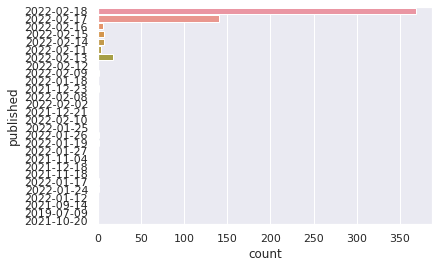

In [ ]:
sns.countplot(y=df_all.published.dt.date, data=df_all);

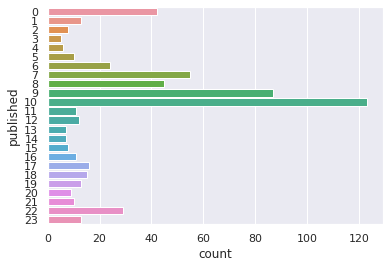

In [ ]:
sns.countplot(y=df_all.published.dt.hour, data=df_all);

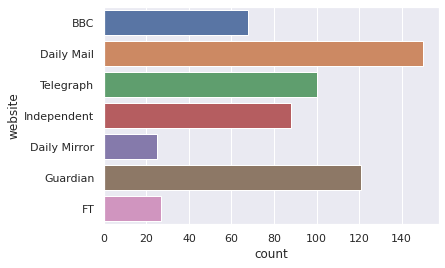

In [ ]:
sns.countplot(y="website", data=df_all);

<div class="alert alert-info">

##### Exercise 4.4

Find all those RSS Feeds that contain either of the words in its title or summary. Use the following list of words:
- Word List A: climate, carbon, sustainab, green, energy
- Word List B: police, constable, cops, officer, weapon

</div>

<div class="alert alert-warning">

**Note1:** If you are not familiar with Regular Expressions, it will be useful to learn a bit about them here. From Wikipedia - *A regular expression (shortened as regex or regexp) is a sequence of characters that specifies a search pattern in text.* It can be extremely powerful **if used correctly**. There are various ways one can form patterns. Here is a cheatsheet that can be useful to learn what are various ways one can form these expressions — https://dl.icewarp.com/online_help/203030104.htm. 

**Note2:** Check here for all pandas functions that can use regex — https://dl.icewarp.com/online_help/203030104.htm and https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/ 

</div>

In [ ]:
pattern = 'climate|carbon|sustainab|green|energy'

matching_items = df_all.title.str.contains(pattern, case=False) | df_all.summary.str.contains(pattern, case=False)

df_all[matching_items]

,title,summary,link,published,website
77,Two men have a lucky escape when car smashes i...,Two men narrowly avoided being ploughed into b...,https://www.dailymail.co.uk/news/article-10526...,2022-02-18 10:42:09+00:00,Daily Mail
86,"Spring could arrive 10 DAYS earlier by 2100, s...",Researchers from the Ohio State University say...,https://www.dailymail.co.uk/sciencetech/articl...,2022-02-18 10:15:42+00:00,Daily Mail
121,Why being 'ghosted' by a best friend is the cr...,JANE GREEN: Despite being able to move between...,https://www.dailymail.co.uk/femail/article-105...,2022-02-18 02:57:13+00:00,Daily Mail
217,"ROSIE GREEN: My love is like a red, red nose…",There's a reason in sickness and in health is ...,https://www.dailymail.co.uk/home/you/article-1...,2022-02-13 00:02:23+00:00,Daily Mail
261,How to avoid the green levies that add £153 on...,NaN,https://www.telegraph.co.uk/money/consumer-aff...,2022-02-18 07:56:16+00:00,Telegraph
367,Who is eligible for help with energy bills and...,<p>Electricity and gas costs to soar by almost...,https://www.independent.co.uk/news/uk/home-new...,2022-02-18 09:47:37+00:00,Independent
380,Storm Eunice: Wind energy generating staggerin...,<p>But storm is expected to cause major disrup...,https://www.independent.co.uk/news/uk/politics...,2022-02-18 09:35:35+00:00,Independent
464,Double trouble with insulation in older homes ...,<p><strong>Colin Burke </strong>on when thick ...,https://www.theguardian.com/society/2022/feb/1...,2022-02-17 18:15:08+00:00,Guardian
478,Staff from climate sceptic group recruited by ...,<p>Further links emerge between Craig Mackinla...,https://www.theguardian.com/environment/2022/f...,2022-02-17 14:17:51+00:00,Guardian
479,Harmful subsidies: why is the world still fund...,<p>Government-financed support in sectors incl...,https://www.theguardian.com/environment/2022/f...,2022-02-17 06:30:28+00:00,Guardian


In [ ]:
pattern = 'police|constable|cops|officer|weapon'

matching_items = df_all.title.str.contains(pattern, case=False) | df_all.summary.str.contains(pattern, case=False)

df_all[matching_items]

,title,summary,link,published,website
10,Quiz of the week: Which songs were used as a w...,How closely have you been paying attention to ...,https://www.bbc.co.uk/news/world-60394107?at_m...,2022-02-17 17:24:51+00:00,BBC
19,SmartWater: The forensic spray helping keep wo...,Police forces in England are trialling SmartWa...,https://www.bbc.co.uk/news/technology-60414452...,2022-02-18 00:55:07+00:00,BBC
52,Can Boris Johnson avoid a lockdown party fine?,The PM is hoping his replies to police on Down...,https://www.bbc.co.uk/news/uk-politics-6040149...,2022-02-17 00:57:27+00:00,BBC
83,Mental health nurse who was accused of assault...,"Heidi Mullis, 32, who was pregnant at the time...",https://www.dailymail.co.uk/news/article-10526...,2022-02-18 10:22:24+00:00,Daily Mail
85,Canada cops arrest Freedom Convoy organizer af...,Protest leaders Tamara Lich and Chris Barber w...,https://www.dailymail.co.uk/news/article-10524...,2022-02-18 10:17:41+00:00,Daily Mail
132,If Trudeau orders the police to drag away the ...,HENLEY: I fear that Canadians are headed for t...,https://www.dailymail.co.uk/news/article-10524...,2022-02-18 01:36:55+00:00,Daily Mail
135,Three Met Police officers charged with sharing...,Two serving Met Police officers and one former...,https://www.dailymail.co.uk/news/article-10523...,2022-02-18 01:17:30+00:00,Daily Mail
147,"Katie Price's fiance Carl Woods, 33, insists h...","Police confirmed today that the 33-year-old, w...",https://www.dailymail.co.uk/news/article-10525...,2022-02-17 23:43:29+00:00,Daily Mail
148,Blinken says Putin might use a 'REAL' chemical...,Blinken on Thursday said Russia's plans for a ...,https://www.dailymail.co.uk/news/article-10523...,2022-02-17 23:34:50+00:00,Daily Mail
163,A legend in his own landscape: For decades Joh...,James Hamilton's latest biography of Suffolk-b...,https://www.dailymail.co.uk/home/books/article...,2022-02-17 22:03:48+00:00,Daily Mail


<div class="alert alert-danger">

##### Advanced! If you need a challenge: robust search for keywords

The method we used works well for a basic search, but is not perfect. For instance, searching for ‘river’ will match both ‘river’, ‘rivers’, but also ’screwdrivers’, ‘strivers’, and ‘driver’. A much better solution is to use simple NLP techniques to extract words and lemmatize them. If you are interested, look at spacy's <a href="https://spacy.io/usage/linguistic-features#lemmatization">lemmatization tutorial</a>.

This library is reasonably easy to use, highly recommend using it! If you are interested, try below to install spacy and define a small function that match a word in a sentence:

```
match_word("driver", "My screwdriver is on the table")  # returns False
match_word("read", "I was reading the paper.")  # returns True
``` 

</div>

# Optional: RSS Aggregators

Imagine you want to get RSS feeds from all available news sources in the UK, far more than you know of. Due to the widespread use of RSS feeds, there are commercial services that have been developed to aggregate RSS feeds from various sources. NewsCatcher (and its Python package `newscatcherapi`) is one of them. Read more about it here: https://github.com/NewscatcherAPI/newscatcherapi-sdk-python


In this exercise, we will run a basic setup of the library. There are far more things that can be done with such aggregators, but our aim is to expose to the tools that you can use in your research.

<div class="alert alert-info">

- First, install the Python package `newscatcherapi`

- Second, register at app.newscatcherapi.com for a free acount and save your access key.

- Finally, as a simple exercise, query the aggregator to collect all news article related to climate and do a value count on the source. 
</div>

In [ ]:
%%capture
!pip install newscatcherapi

In [ ]:
from newscatcherapi import NewsCatcherApiClient

In [ ]:
newscatcherapi = NewsCatcherApiClient(x_api_key='YOUR API KEY GOES HERE') 

all_articles = newscatcherapi.get_search(q='climate',
                                         lang='en',
                                         countries='GB',
                                         page_size=100)

df_news = pd.DataFrame(all_articles['articles'])

Explore how NewsCatcher encodes information. What additional fields does this service offer compared to RSS feeds?
Where do you think they come from?

In [ ]:
df_news.head()

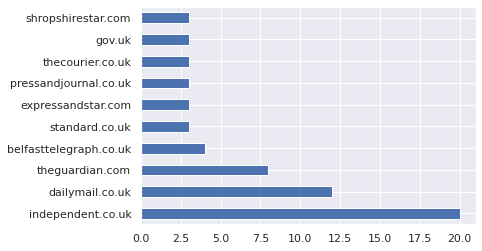

In [ ]:
df_news.clean_url.value_counts()[:10].plot.barh();

<div class="alert alert-info">

Now, reproduce the exercise 4.4 using NewsCatcher. What do you notice in terms of volume of collected articles?

</div>

## Documenting your final dataset using a ‘datasheet’

In exercise 4.4, you built a dataset from online sources, parsed, filtered, processed using code you developed. Increasingly, journals and conferences ask researchers to document how they collected data.

Gebru et al. proposed in 2018 a new toolkit ([Datasheets for Datasets](https://arxiv.org/abs/1803.09010)) to improve the transparency when releasing datasets as well as the standardise how datasets are described. A ‘datasheet’ documents the motivation behind the dataset creation, the dataset composition, collection process, recommended uses, and many other characteristics. In the words of Gebru et al., the goal is to:

> facilitate better communication between dataset creators and dataset consumers, and encourage the […] community to prioritize transparency and accountability.

Throughout this course, we will aim to build on the practice of documenting our datasets. For each week, the homework  will comprise some form of dataset collection. You will also be required to answer 4-5 questions on the dataset you collect for that week.

You can find an example of a datasheet here: https://github.com/zykls/folktables/blob/main/datasheet.md for the Folktables Python package. You can think of a datasheet as a set of standardised questions & answers that describe the content and ethics of your dataset.

--------


<div class="alert alert-info">
For this week's homework, we will start with basic Motivation and Composition questions. Look back at the dataset you assembed for exercise 4.4 and answer the following questions.
</div>


>**For what purpose was the dataset created?** *Was there a specific task in mind? Was there a specific gap that needed to be filled?*
>
>...


>**Who created the dataset (e.g., which team) and on behalf of which entity?**
>
>...


>**What do the instances that comprise the dataset represent (e.g., documents, photos, people, countries)?** Are there multiple types of instances (e.g., movies, users, and ratings; people and interactions between them; nodes and edges)? Please provide a description.
>
>...


>**How many instances are there in total (of each type, if appropriate)?**
>
>...




>**Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set? If the dataset is a sample, then what is the larger set? Is the sample representative of the larger set (e.g., geographic coverage)?** If so, please describe how this representativeness was validated/verified. If it is not representative of the larger set, please describe why not (e.g., to cover a more diverse range of instances, because instances were withheld or unavailable)
>
>...

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f746e373-dc41-4dbe-b3f9-5f3af42ff658' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>